In [76]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae 
from scipy import stats
import seaborn as sns

In [77]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Field = cwd + '\\FieldData'
cwd_Field_DataMerged = cwd_Field + '\\Field Dataset Merged'
cwd_Field_DataMerged_CSV_Indices = cwd_Field_DataMerged + "\\CSV Biodiversity Indices"
cwd_PRISMA = cwd + "\\PRISMA Raster Raw\\Merged"
cwd_PRISMA_Result = cwd + "\\ResultsPRISMA"
cwd_Field_Data1 = cwd_Field + '\\Field Dataset 1'
cwd_Field_Data1_CSV = cwd_Field_Data1 + "\\CSV"

In [78]:
# Get the name of all the rasters in our folder
raster_Names = []
for item in [name.split('.')[0] for name in os.listdir(cwd_PRISMA)]:
    if item not in raster_Names:
        raster_Names.append(item)
raster_Names

['PRS_L2D_STD_20220611_20220710_NS_mosaic_crop_smooth_v2i',
 'PRS_L2D_STD_20220906_20220911_NS_mosaic_crop_smooth_v2i']

In [79]:
df_Raster_6 = pd.read_csv(cwd_PRISMA_Result + "\\15\\" + raster_Names[0] + "\\AlphaDiversity5_15PCs.csv", sep = '\t')
df_Raster_9 = pd.read_csv(cwd_PRISMA_Result + "\\15\\" + raster_Names[1] + "\\AlphaDiversity5_15PCs.csv", sep = '\t')
df_Raster_6.head()

,Plot,Species_Richness,Fisher,Shannon,Simpson
0,FOR01,3.90,0,1.146451,0.629760
1,FOR02,3.50,0,1.042234,0.598264
2,FOR03,3.65,0,0.974481,0.544218
3,FOR04,3.10,0,0.835767,0.505280
4,FOR05,2.50,0,0.642536,0.409070


In [80]:
df_Raster_Merge = pd.merge(df_Raster_6[['Plot','Species_Richness','Shannon','Simpson']],df_Raster_9[['Plot','Species_Richness','Shannon','Simpson']], on = 'Plot', suffixes= [' June', ' Sep'])
df_Raster_Merge.head()

,Plot,Species_Richness June,Shannon June,Simpson June,Species_Richness Sep,Shannon Sep,Simpson Sep
0,FOR01,3.90,1.146451,0.629760,4.70,1.146673,0.618880
1,FOR02,3.50,1.042234,0.598264,2.05,0.283324,0.152778
2,FOR03,3.65,0.974481,0.544218,3.95,0.812720,0.422676
3,FOR04,3.10,0.835767,0.505280,2.10,0.372404,0.212800
4,FOR05,2.50,0.642536,0.409070,1.05,0.009572,0.004535


In [81]:
df_Raster_Merge.columns = ['Plot','Raster Species Richness June','Raster Shannon June','Raster Simpson June','Raster Species Richness Sep','Raster Shannon Sep','Raster Simpson Sep']
df_Raster_Merge.head()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep
0,FOR01,3.90,1.146451,0.629760,4.70,1.146673,0.618880
1,FOR02,3.50,1.042234,0.598264,2.05,0.283324,0.152778
2,FOR03,3.65,0.974481,0.544218,3.95,0.812720,0.422676
3,FOR04,3.10,0.835767,0.505280,2.10,0.372404,0.212800
4,FOR05,2.50,0.642536,0.409070,1.05,0.009572,0.004535


In [82]:
list_Plots_All = list(df_Raster_Merge.iloc[0:63,0])
list_Plots_Upper = ['FOR23','FOR24','FOR25','FOR26','FOR27','FOR28','FOR29','FOR30','FOR31']
list_Plots_Lower = []
for plot in list_Plots_All:
    if plot not in list_Plots_Upper:
        list_Plots_Lower.append(plot)

In [83]:
df_Association = pd.read_csv(cwd_Field_Data1_CSV + "\\FieldData1 Valid Association.csv")
df_Association.head()

,Plot,Association
0,FOR01,Oak_hornbeam_humid
1,FOR02,Prunus
2,FOR03,Prunus
3,FOR04,Oak_open_canopy
4,FOR05,Oak_open_canopy


In [84]:
df_Raster_Merge_1 = pd.merge(df_Raster_Merge.iloc[0:63,:],df_Association,on='Plot')
df_Raster_Merge_1.tail()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep,Association
58,FOR78,2.40,0.680545,0.43728,2.55,0.621076,0.38048,Prunus
59,FOR79,3.30,0.854111,0.47344,4.25,0.934718,0.48336,Mixed deciduous
60,FOR80,2.85,0.490892,0.26848,1.10,0.016794,0.00768,Mixed deciduous
61,FOR81,3.75,1.012975,0.55136,2.05,0.602066,0.41136,Mixed deciduous
62,FOR82,3.15,0.707397,0.38864,1.40,0.111745,0.06080,Mixed deciduous


In [85]:
df_Raster_Merge_1_Lower = df_Raster_Merge_1.copy()
df_Raster_Merge_1_Lower = df_Raster_Merge_1_Lower[~df_Raster_Merge_1['Plot'].isin(list_Plots_Upper)]
df_Raster_Merge_1_Lower.count()

Plot                            54
Raster Species Richness June    54
Raster Shannon June             54
Raster Simpson June             54
Raster Species Richness Sep     54
Raster Shannon Sep              54
Raster Simpson Sep              54
Association                     54
dtype: int64

## Species Richness

In [86]:
df_Field_Richness = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid SpeciesRichness.csv")
df_Field_Richness.head()

,Plot,Field Species Richness
0,FOR01,5
1,FOR02,7
2,FOR03,4
3,FOR04,2
4,FOR05,1


In [87]:
df_Field_Richness_1 = df_Field_Richness.copy().iloc[0:63,:]
df_Field_Richness_1.tail()

,Plot,Field Species Richness
58,FOR78,2
59,FOR79,4
60,FOR80,3
61,FOR81,4
62,FOR82,4


In [88]:
df_Richness_1 = pd.merge(df_Field_Richness_1,df_Raster_Merge_1_Lower[['Plot','Association','Raster Species Richness June','Raster Species Richness Sep']],on = 'Plot')
df_Richness_1.count()

Plot                            54
Field Species Richness          54
Association                     54
Raster Species Richness June    54
Raster Species Richness Sep     54
dtype: int64

In [89]:
df_Richness_1.describe()

,Field Species Richness,Raster Species Richness June,Raster Species Richness Sep
count,54.000000,54.000000,54.000000
mean,3.814815,3.461111,2.931481
std,1.802243,1.204107,1.371967
min,1.000000,1.200000,1.050000
25%,2.000000,2.500000,1.750000
50%,4.000000,3.425000,2.725000
75%,4.750000,4.375000,3.925000
max,8.000000,6.150000,6.700000


In [90]:
df_Richness_1_Asso = df_Richness_1.copy().sort_values('Association')
df_Richness_1_Asso.head()

,Plot,Field Species Richness,Association,Raster Species Richness June,Raster Species Richness Sep
26,FOR55,2,Alder,4.50,2.45
43,FOR72,2,Alder,3.10,6.70
7,FOR08,4,Alder,4.55,3.35
32,FOR61,7,Alder,4.30,5.55
27,FOR56,2,Alder,3.85,4.65


In [91]:
list_Plot_Outlier = ['FOR72','FOR59','FOR51', 'FOR69','FOR29']
df_Richness_1_Asso_NoOut = df_Richness_1_Asso.copy()
# Drop those outliers! 
df_Richness_1_Asso_NoOut = df_Richness_1_Asso_NoOut[~df_Richness_1_Asso_NoOut['Plot'].isin(list_Plot_Outlier)]
df_Richness_1_Asso_NoOut.describe()

,Field Species Richness,Raster Species Richness June,Raster Species Richness Sep
count,50.000000,50.000000,50.00000
mean,3.860000,3.471000,2.89000
std,1.761377,1.192241,1.29839
min,1.000000,1.200000,1.05000
25%,3.000000,2.500000,1.75000
50%,4.000000,3.500000,2.72500
75%,4.750000,4.375000,3.92500
max,8.000000,6.150000,5.55000


C:\Users\m1865\AppData\Local\Temp\ipykernel_21632\1537047536.py:2: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness June', data = df_Richness_1_Asso, hue = 'Association',


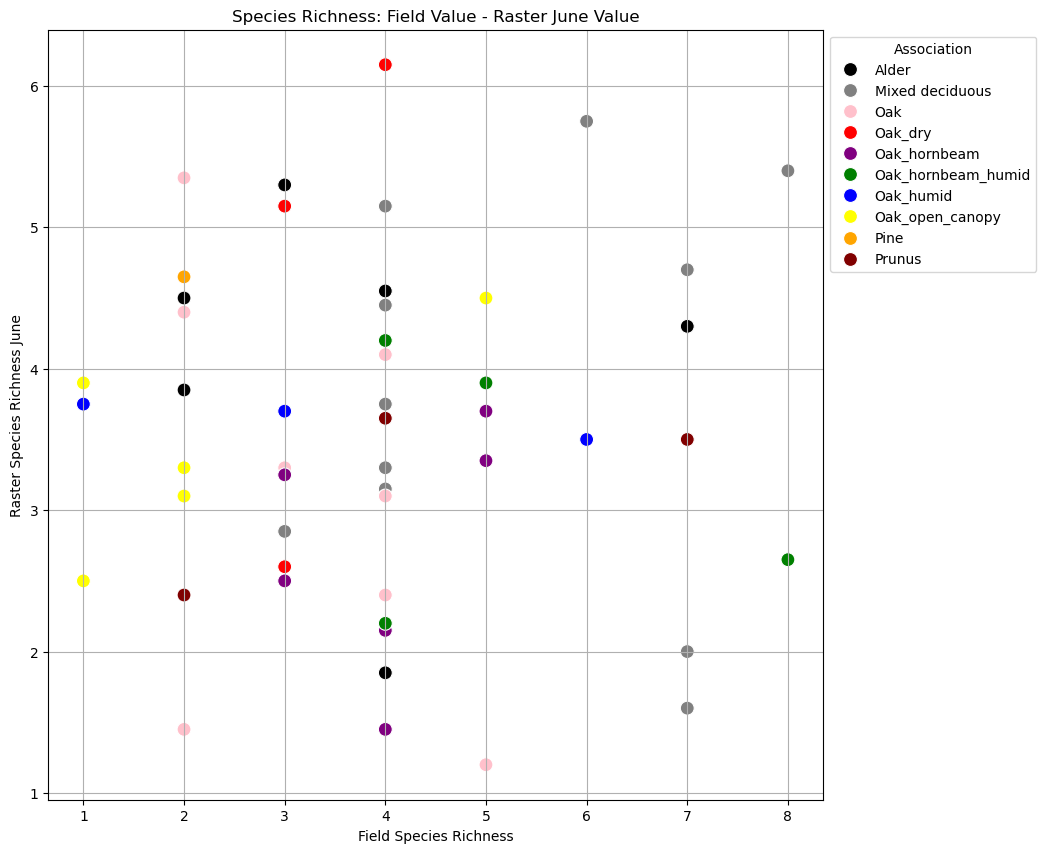

In [92]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness June', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster June Value')
plt.show()

C:\Users\m1865\AppData\Local\Temp\ipykernel_21632\3332241776.py:2: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness June', data = df_Richness_1_Asso_NoOut, hue = 'Association',


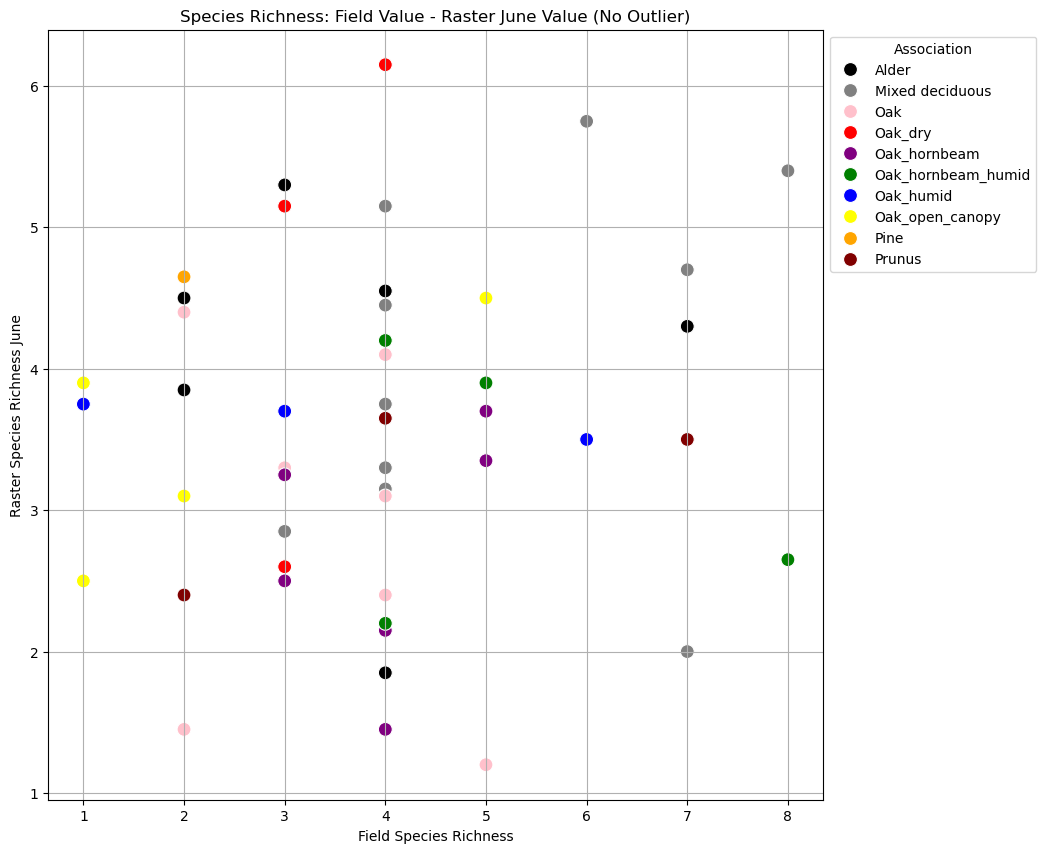

In [93]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness June', data = df_Richness_1_Asso_NoOut, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster June Value (No Outlier)')
plt.show()

C:\Users\m1865\AppData\Local\Temp\ipykernel_21632\1167002614.py:2: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness Sep', data = df_Richness_1_Asso, hue = 'Association',


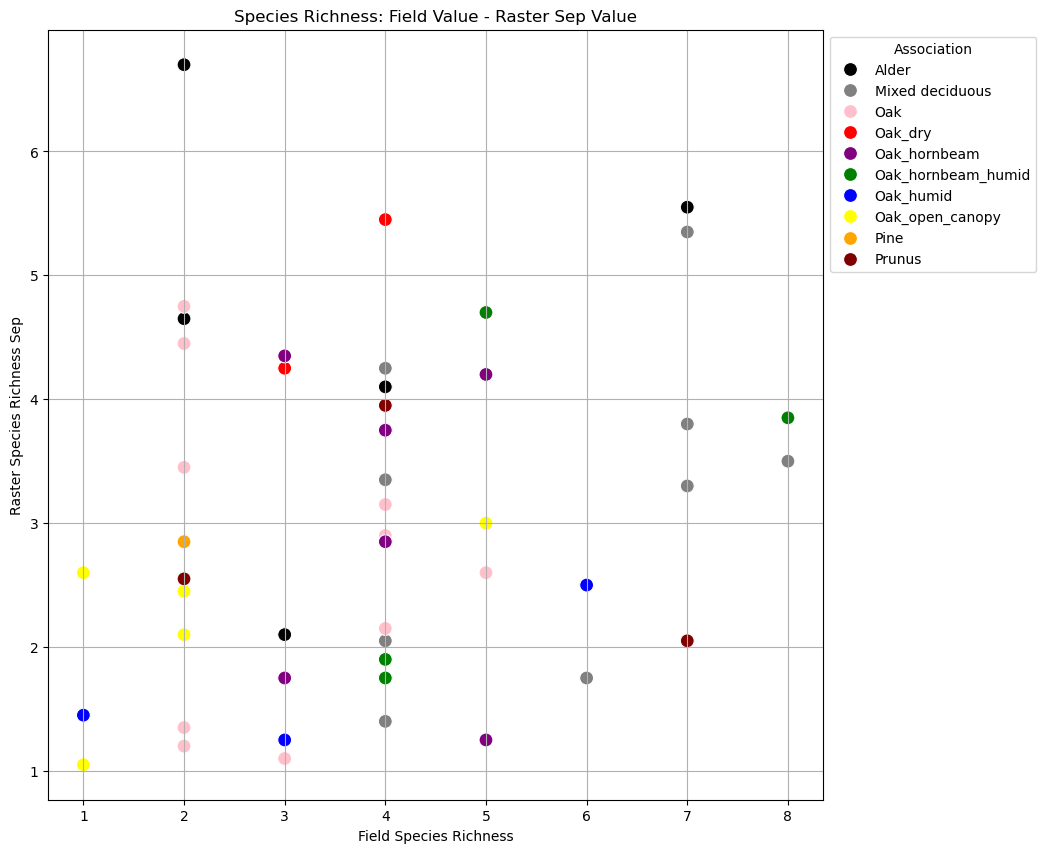

In [94]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness Sep', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster Sep Value')
plt.show()

In [95]:
from scipy.spatial import distance
from scipy.stats import kendalltau
distance.correlation(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

0.9238263242643714

In [96]:
distance.correlation(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

0.7621890060716712

In [97]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

1.199173927588078
0.23313410982665683
We fail to reject NULL HYPOTHESIS!
The Pearson correlation coefficient is equal to 0.07617367573562854
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [98]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1_Asso_NoOut['Field Species Richness'], df_Richness_1_Asso_NoOut['Raster Species Richness June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1_Asso_NoOut['Field Species Richness'], df_Richness_1_Asso_NoOut['Raster Species Richness June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

1.2932388480281785
0.19896866118863454
We fail to reject NULL HYPOTHESIS!
The Pearson correlation coefficient is equal to 0.16663868140236254
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [99]:
r2_score(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

-0.38383713425129073

In [100]:
mae(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

1.6314814814814815

In [101]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

2.865808323862442
0.005017181597066047
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to 0.23781099392832883
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [102]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1_Asso_NoOut['Field Species Richness'], df_Richness_1_Asso_NoOut['Raster Species Richness Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1_Asso_NoOut['Field Species Richness'], df_Richness_1_Asso_NoOut['Raster Species Richness Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!" + str(pear.pvalue))

3.1344953769276507
0.0022717259888019436
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to 0.296089393111215
Perfect! The Pearson correlation coefficient is considered statistically significant!


In [103]:
r2_score(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

-0.46219987091222037

In [104]:
mae(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

1.7314814814814814

## Shannon

In [105]:
df_Field_Shannon = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid Shannon.csv")
df_Field_Shannon.head()

,Plot,Field Shannon
0,FOR01,1.267990
1,FOR02,1.604816
2,FOR03,0.534923
3,FOR04,0.474139
4,FOR05,0.000000


In [106]:
df_Field_Shannon_1 = df_Field_Shannon.copy().iloc[0:63,:]

In [107]:
df_Shannon_1 = pd.merge(df_Field_Shannon_1,df_Raster_Merge_1_Lower[['Plot','Association','Raster Shannon June','Raster Shannon Sep']],on = 'Plot')
df_Shannon_1.count()

Plot                   54
Field Shannon          54
Association            54
Raster Shannon June    54
Raster Shannon Sep     54
dtype: int64

In [108]:
df_Shannon_1_Asso = df_Shannon_1.copy().sort_values('Association')
df_Shannon_1_Asso.tail()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
3,FOR04,0.474139,Oak_open_canopy,0.835767,0.372404
21,FOR22,0.250955,Pine,1.269429,0.351060
49,FOR78,0.286836,Prunus,0.680545,0.621076
2,FOR03,0.534923,Prunus,0.974481,0.812720
1,FOR02,1.604816,Prunus,1.042234,0.283324


In [109]:
df_Shannon_1_Asso.describe()

,Field Shannon,Raster Shannon June,Raster Shannon Sep
count,54.000000,54.000000,54.000000
mean,0.898097,0.774128,0.600594
std,0.477260,0.370794,0.404682
min,0.000000,0.053375,0.009572
25%,0.522371,0.501762,0.291080
50%,0.913191,0.796709,0.599968
75%,1.258550,1.049235,0.930381
max,1.794190,1.496693,1.650733


In [110]:
df_Shannon_1_Asso_NoZero = df_Shannon_1_Asso.copy()
df_Shannon_1_Asso_NoZero = df_Shannon_1_Asso_NoZero.loc[df_Shannon_1_Asso_NoZero['Field Shannon']!=0]
df_Shannon_1_Asso_NoZero.head()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
26,FOR55,0.276191,Alder,1.062438,0.407234
43,FOR72,0.491327,Alder,0.688070,1.650733
7,FOR08,0.804448,Alder,1.166987,0.878664
32,FOR61,1.259200,Alder,1.021316,1.396478
27,FOR56,0.482578,Alder,0.838506,1.157099


C:\Users\m1865\AppData\Local\Temp\ipykernel_21632\938781936.py:2: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon June', data = df_Shannon_1_Asso, hue = 'Association',


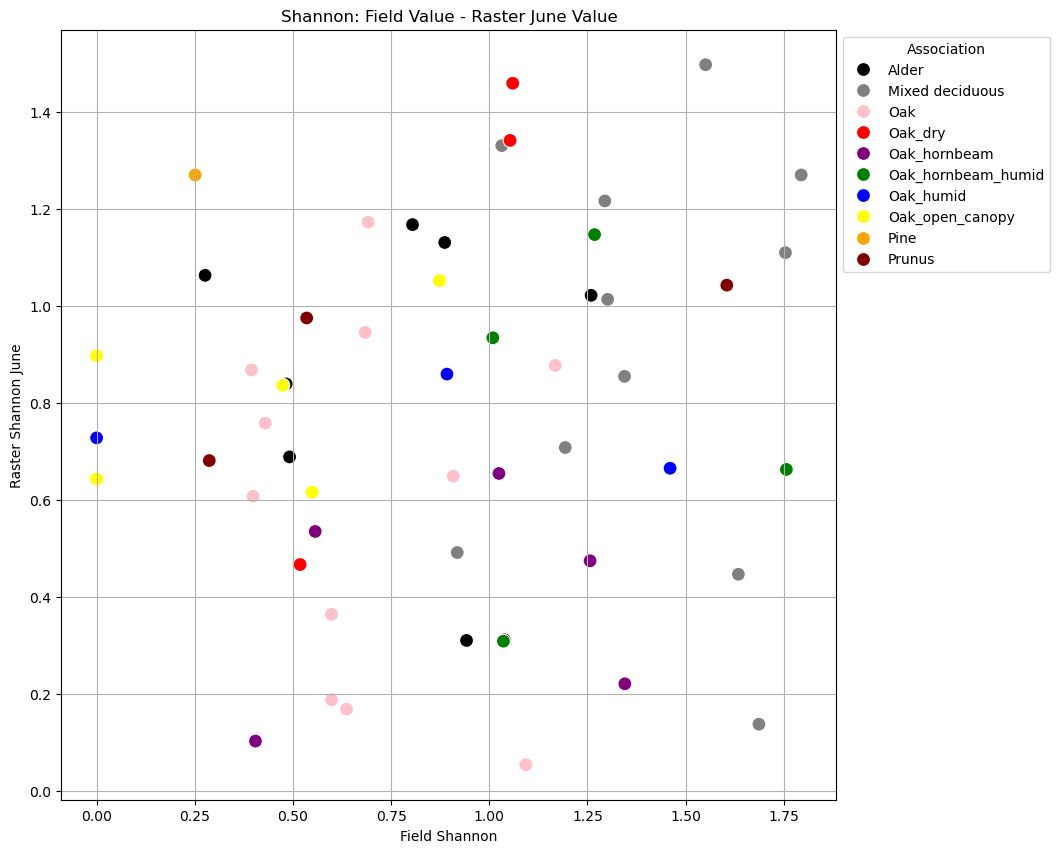

In [111]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon June', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: Field Value - Raster June Value')
plt.show()

In [112]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1_Asso['Field Shannon'], df_Shannon_1_Asso['Raster Shannon June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1_Asso['Field Shannon'], df_Shannon_1_Asso['Raster Shannon June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

1.5073242355585088
0.13470215582703357
We fail to reject NULL HYPOTHESIS!
The Pearson correlation coefficient is equal to 0.1164824772948451
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [113]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

-0.4913590779442498

In [114]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

0.47233199260275277

C:\Users\m1865\AppData\Local\Temp\ipykernel_21632\2398043502.py:2: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon Sep', data = df_Shannon_1_Asso, hue = 'Association',


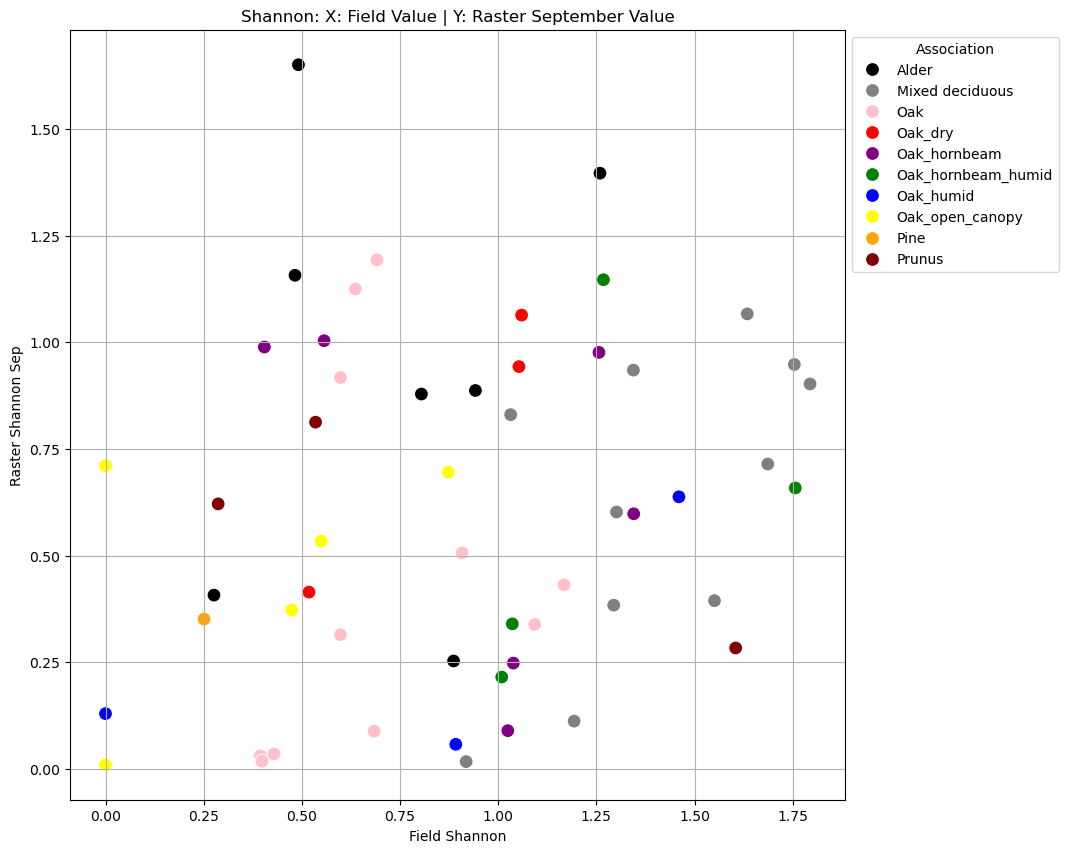

In [115]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon Sep', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: X: Field Value | Y: Raster September Value')
plt.show()

In [116]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1_Asso['Field Shannon'], df_Shannon_1_Asso['Raster Shannon Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1_Asso['Field Shannon'], df_Shannon_1_Asso['Raster Shannon Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

3.49379977059722
0.0006961067223035028
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!
The Pearson correlation coefficient is equal to 0.19898983805101353
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [117]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

-0.777430094258746

In [118]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

0.5228031026529556

In [119]:
distance.correlation(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

0.8010101619489864

In [120]:
distance.correlation(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

0.8835175227051549

In [121]:
tau, p_value = kendalltau(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])
print(tau)
print(p_value)

0.06295911126135537
0.5018990779084705


In [122]:
tau, p_value = kendalltau(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])
print(tau)
print(p_value)

0.16649187200225082
0.07577300672470433


In [123]:
tau, p_value = kendalltau(df_Richness_1_Asso['Field Species Richness'], df_Richness_1_Asso['Raster Species Richness June'])
print(tau)
print(p_value)

0.05804647559929641
0.566386354746998


In [124]:
tau, p_value = kendalltau(df_Richness_1_Asso['Field Species Richness'], df_Richness_1_Asso['Raster Species Richness Sep'])
print(tau)
print(p_value)

0.17646128582186107
0.08128532045693622
